ex1.1

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [48]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [49]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b1

2.620538882402765

In [50]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

In [67]:
scoring = scoring.reshape(scoring.size, 1)
scoring

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [68]:
salary = salary.reshape(salary.size, 1)
salary

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [69]:
ones = np.ones((salary.shape[0], 1))
salary = np.hstack((ones, salary))
salary

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [70]:
XTX = salary.T.dot(salary)
np.linalg.det(XTX)

349464.00000000023

In [71]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(salary.T).dot(scoring)
print(b)

[[444.17735732]
 [  2.62053888]]


ok

ex1.2

In [74]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

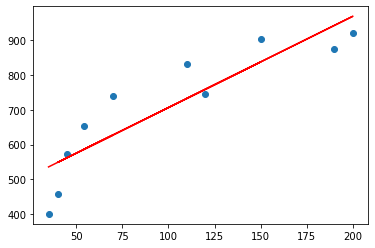

In [75]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red')

ex1.3

In [76]:
R2 = oy.var() / scoring.var()
R2

0.7876386635293678

In [77]:
A_bar = np.abs((scoring - oy) / scoring).mean()
A_bar

0.11469251843561709

ex1.4

In [78]:
k1 = 1
k2 = 8

T1 = (R2 / (1 - R2)) * (k2 / k1)
T1

29.67164085966437

𝛼=0.05, 𝐹𝑐𝑟𝑖𝑡=𝐹(1,8) = 5.32

In [80]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

T > F_crit => статистически значимо

ex1.5

In [82]:
b0, b1

(444.1773573243596, 2.620538882402765)

In [83]:
n = salary.shape[0]
    
upper = ((scoring - oy) ** 2).sum() / (n - 2)
lower = ((salary - salary.mean()) ** 2).sum()

s_slope = np.sqrt(upper / lower)
s_slope

0.48108279568516005

𝛼=0.05, n=10 => t(1−0.05/2, 8)=2.306

In [84]:
T = b1 / s_slope
T

5.447168150485579

In [85]:
t = 2.306

(b1 - t * s_slope, b1 + t * s_slope)

(1.5111619555527858, 3.729915809252744)

Значение попало в критическую область. Если полученное нами значение  𝑏̂1  попадает в критическую область, то нулевая гипотеза (об отсутствии корреляции между значениями из  𝑥  и  𝑦 ) отвергается, откуда следует, что параметр  𝑏1  является значимым.

b0:

In [87]:
s_intercept = s_slope * np.sqrt((salary ** 2).mean())
s_intercept

56.46649755068153

In [88]:
T = b0 / s_intercept
T

7.866210524668863

Значение попало в критическую область, значит, значение параметра  𝑏0  является значимым.

ex2

В случае, когда проверяются гипотезы относительно математического ожидания нормально распределённой случайной величины с неизвестной дисперсией пользуются т.н. t-распределением (или t-критерием Стьюдента); используется таблица значений функции Лапласа, если известна дисперсия